# Step [1]: Prepare libraries and data

## [1.1] Include important libraries

In [ ]:
!pip install arabic-reshaper

In [ ]:
!pip install wordcloud

In [ ]:
!pip install PyArabic

     |████████████████████████████████| 126 kB 5.4 MB/s 


In [ ]:
!pip install python-bidi

In [ ]:
!pip install qalsadi

     |████████████████████████████████| 257 kB 5.4 MB/s 
     |████████████████████████████████| 9.2 MB 45.4 MB/s 
     |████████████████████████████████| 353 kB 44.7 MB/s 
     |████████████████████████████████| 138 kB 57.2 MB/s 
     |████████████████████████████████| 332 kB 39.0 MB/s 
     |████████████████████████████████| 244 kB 22.7 MB/s 
     |████████████████████████████████| 50 kB 5.6 MB/s 
  Created wheel for pickledb: filename=pickleDB-0.9.2-py3-none-any.whl size=4268 sha256=75c7f43e65e9bea0574253539f9314a75e5d6e19b9d9ccfc8e445e7492400fbf
  Stored in directory: /root/.cache/pip/wheels/08/34/42/9a7f94099208ce3d32638d98586a5a50f821db2fc75a3bdaae
Successfully built pickledb


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from zipfile import ZipFile
file_name="/content/drive/MyDrive/TwtSG.zip"
with ZipFile (file_name,'r') as zip:
   zip.extractall()
   print('Done')

Done


In [ ]:
import nltk
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt           
import matplotlib
from wordcloud import WordCloud
from collections import Counter
#from bidi.algorithm import get_display   
#from arabic_reshaper import reshape
from nltk.tokenize import TweetTokenizer
#import pyarabic.araby as araby
#import pyarabic
from nltk.tokenize import word_tokenize
#from tashaphyne.stemming import ArabicLightStemmer
#import qalsadi.lemmatizer
from nltk.corpus import stopwords
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Activation, Dropout, Input, LSTM, Reshape, Lambda, RepeatVector,Bidirectional,GRU
from keras.layers import Dense, LSTM, InputLayer, Bidirectional, TimeDistributed, Embedding, Activation,SpatialDropout1D
from keras import regularizers
from nltk.tokenize import word_tokenize
from collections import Counter
import gensim
import re
import pyarabic.araby as araby
import tashaphyne.arabic_const as arabconst
from sklearn.metrics import accuracy_score
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
# load the model
model = gensim.models.Word2Vec.load('TwtSG/Twt-SG')

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## [1.2] Download data

In [ ]:
!wget 'https://drive.google.com/uc?export=download&id=1KepfzAhJ7dloG8XaWQf0ovQipDHYS8aI' -O 'final_data.zip'

--2021-12-19 14:58:36--  https://drive.google.com/uc?export=download&id=1KepfzAhJ7dloG8XaWQf0ovQipDHYS8aI
Resolving drive.google.com (drive.google.com)... 173.194.74.101, 173.194.74.102, 173.194.74.139, ...
Connecting to drive.google.com (drive.google.com)|173.194.74.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0o-00-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/h1m2l3de23btabg3ro3cfn6ee1hb9ol6/1639925850000/04260309330816471542/*/1KepfzAhJ7dloG8XaWQf0ovQipDHYS8aI?e=download [following]
--2021-12-19 14:58:38--  https://doc-0o-00-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/h1m2l3de23btabg3ro3cfn6ee1hb9ol6/1639925850000/04260309330816471542/*/1KepfzAhJ7dloG8XaWQf0ovQipDHYS8aI?e=download
Resolving doc-0o-00-docs.googleusercontent.com (doc-0o-00-docs.googleusercontent.com)... 74.125.70.132, 2607:f8b0:4001:c02::84
Connecting to doc-0o-00-docs.googleusercontent.com (doc-0o-

In [ ]:
!unzip final_data.zip

Archive:  final_data.zip
  inflating: test.csv                
  inflating: train.csv               
  inflating: valid.csv               


## [1.3] read data from csv file

In [ ]:
test = pd.read_csv('test.csv')

In [ ]:
train = pd.read_csv('train.csv')

In [ ]:
valid = pd.read_csv('valid.csv')

In [ ]:
train.head()

,tweet,label
0,#تبني_قطط_انقاذ من الخاص هاااام كيتن أنثى عمره...,2
1,'#خذ_الخطوة_خذ_اللقاح \nالحمدالله من قبل ومن ب...,1
2,لو اللي مثلك وشرواك طعمو كان قد حذفنا الكمامات...,1
3,#الصحة:•نحو 14.5 مليون شخص تم إعطاؤهم جرعة لقا...,1
4,• في منظور القوة البشرية ( الأزمة ستطول لأشهر ...,3


In [ ]:
train[train.isnull().any(axis=1)]

,tweet,label
4597,NaN,2


In [ ]:
train.drop(4597, inplace=True)

In [ ]:
train[train.isnull().any(axis=1)]

,tweet,label


In [ ]:
df =train.copy(deep=True)
### Separate the majority and minority classes
df_0 = df[df['label']==0]
df_1= df[df['label']==1]

### Now, downsamples majority labels equal to the number of samples in the minority class

df_1 = df_1.sample(len(df_0), random_state=0)

### concat the majority and minority dataframes
df = pd.concat([df_1,df_0])

## Shuffle the dataset to prevent the model from getting biased by similar samples
df = df.sample(frac=1, random_state=0)
labels = list(df["label"])
fdist = nltk.FreqDist(w for w in labels)
print (fdist.items())

dict_items([(0, 2783), (1, 2783)])


## [1.4] Prapere The Comparison Dictionary

In [ ]:
model_comparison_table = {}

In [ ]:
model_comparison_table['model_name'] = []
model_comparison_table['preprocessing_methods'] = []
model_comparison_table['accuracy'] = []

# Step [2]: Build Baseline

## [2.1] Extract Bag of Words Features

In [ ]:
x_trainBalance = df[(df["label"] == 0) | (df["label"] == 1)]['tweet'].tolist()
y_trainBalance = df[(df["label"] == 0) | (df["label"] == 1)]['label'].tolist()

In [ ]:
x_train = train[(train["label"] == 0) | (train["label"] == 1)]['tweet'].tolist()
y_train = train[(train["label"] == 0) | (train["label"] == 1)]['label'].tolist()
x_test  = test[(test["label"] == 0) | (test["label"] == 1)]['tweet'].tolist()
y_test  = test[(test["label"] == 0) | (test["label"] == 1)]['label'].tolist()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def cv(data):
    count_vectorizer = CountVectorizer(ngram_range=(1,2))

    emb = count_vectorizer.fit_transform(data)

    return emb, count_vectorizer

X_train_counts, count_vectorizer = cv(x_train)
X_test_counts = count_vectorizer.transform(x_test)

In [ ]:
X_train_countsBalance, count_vectorizer1 = cv(x_trainBalance)
X_test_countsBalance = count_vectorizer1.transform(x_test)

## [2.2] Train model

In [ ]:
from sklearn.linear_model import LogisticRegression,RidgeClassifier

clf = LogisticRegression(solver = 'liblinear', C=4, penalty = 'l2')
clf.fit(X_train_counts, y_train)

y_predicted = clf.predict(X_test_counts)

In [ ]:
clf.fit(X_train_countsBalance, y_trainBalance)

y_predictedBalance = clf.predict(X_test_countsBalance)

## [2.3] Evaluation

In [ ]:
accuracy=accuracy_score(y_test, y_predicted)
accuracy

0.7854251012145749

In [ ]:
accuracyBalance=accuracy_score(y_test, y_predictedBalance)
accuracyBalance

0.7618697092381302

في المثال التالي طريقة إدخال وكتابة اسم النموذج والعمليات وإدخال الدقة

In [ ]:
model_comparison_table['model_name'].append("logistic regression with bag of words")
model_comparison_table['preprocessing_methods'].append("none")
model_comparison_table['accuracy'].append(accuracy)

In [ ]:
model_comparison_table['model_name'].append("logistic regression with bag of words with Balance")
model_comparison_table['preprocessing_methods'].append("none")
model_comparison_table['accuracy'].append(accuracyBalance)

# Step [3]: Build model with preprocessing methods

## [3.1] Extract Bag of Words Features

In [ ]:
#remove link from tweets
def remove_link(tweet,work):
   """Process tweet function.
    Input:
        tweet: a string containing a tweet without changing
    Output:
        cleaned_tweet: tweet after removing link

    """
   if work ==1:
      newtweet = re.sub("(https|http|ftp)?://\S*.((\S*\S*)|(\S*))", " ", tweet)
   else:
     newtweet = tweet
   return newtweet

In [ ]:
#remove duplicate from tweet 
def remov_duplicates(tweet,work):
   
   """Process tweet function.
    Input:
        tweet: a string containing a tweet without changing
    Output:
        cleaned_tweet: tweet after removing duplicates

    """
   if work ==1:
      newtweet = re.sub(r'(\w)\1+', r'\1', tweet)
   else:
     newtweet = tweet
   return newtweet

In [ ]:
 #تنضيف الداتا من اسماء المستخدمين
def remove_tweets_username(tweet,work):
    """Process tweet function.
    Input:
        tweet: a string containing a tweet without changing
    Output:
        cleaned_tweet: tweet after removing username

    """
    if work ==1:
      pattern = r"@\S+"
      newtweet =re.sub(pattern,'',tweet)
    else :
      newtweet = tweet
    return newtweet

In [ ]:
#حذف الايموجي ممكن يدل على مشاعر سلبية مثل السخرية من اللقاح بالرغم من ان تعبير الجملة ايجابي
#remove emojis
def remove_emojis(tweet,work):

   """Process tweet function.
    Input:
        tweet: a string containing a tweet without changing
    Output:
        cleaned_tweet: tweet after removing emojis

    """
   emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
   if work ==1:
     newtweet = re.sub(emoj, '', tweet)
   else:
     newtweet = tweet

   return newtweet

In [ ]:
# remove punctuation

def remove_punctuation(tweet,work):
   """Process tweet function.
    Input:
        tweet: a string containing a tweet without changing
    Output:
        cleaned_tweet: tweet after removing punctuation

    """
   #punctuatuions = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
   if work ==1:
      newtweet = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~|\•|\)|\(”“"""), ' ', tweet)
   else:
     newtweet = tweet
   return newtweet

In [ ]:
#نضيف الداتا من علامات الترقيم والمحارف غير الضرورية و التشكيل
def remove_tweets_other(tweet,work):
    """Process tweet function.
    Input:
        tweet: a string containing a tweet without changing
    Output:
        cleaned_tweet: tweet after removing tweets_other

    """
    if work ==1:
        pattern = r"\n|,|;|\(|\)|\}|\{|\||\.|\|\$|\"|\'|/|%|\\|\*|\^|\&|\+\-|~|؟|،|…|-|﴿|﴾|•|<|>|»|«|:|؛|ّ|َ|ً|ٍ|ِ|ْ|ٌ|ُ"
        newtweet =re.sub(pattern,'',tweet)
    else:
      newtweet=tweet
    return newtweet

In [ ]:
#تنضيف الداتا من الصور
def remove_tweets_img(tweet,work):
   """Process tweet function.
    Input:
        tweet: a string containing a tweet without changing
    Output:
        cleaned_tweet: tweet after removing tweets_img

    """
   if work ==1:
       pattern = r"pic\.twitter\.com/\S+"
       newtweet =re.sub(pattern,'',tweet)
   else:
      newtweet=tweet
   return newtweet

In [ ]:
#نوحيد الهمزات
def hamzat_normalizing(text):
    text = arabconst.ALEFAT_PAT.sub(arabconst.ALEF, text)
    return arabconst.HAMZAT_PAT.sub(arabconst.HAMZA, text)

In [ ]:
#تحويل التاء المربوطة الى هاء والألف المقصورة الى ياء
def spellerrors_normalizing(text):
    text = re.sub(u'[%s]' % arabconst.TEH_MARBUTA, arabconst.HEH, text)
    return re.sub(u'[%s]' % arabconst.ALEF_MAKSURA, arabconst.YEH, text)

In [ ]:
def strip_tashkeel(text):
    return arabconst.HARAKAT_PAT.sub('', text)

In [ ]:
def strip_tatweel(text):
    return re.sub(u'[%s]'% arabconst.TATWEEL,'', text)

In [ ]:
def normalizing(tweet,work):
   """Process tweet function.
    Input:
        tweet: a string containing a tweet without changing
    Output:
        cleaned_tweet: tweet after removing tweets_img

    """
   if work ==1:
     newtweet = hamzat_normalizing(tweet)
     newtweet = spellerrors_normalizing(newtweet)
     newtweet = strip_tashkeel(newtweet)
     newtweet = strip_tatweel(newtweet)
   else:
      newtweet=tweet
   return newtweet

In [ ]:
#توحيد الاحرف 
def normalizeArabic(text,work):
   """Process tweet function.
    Input:
        tweet: a string containing a tweet without changing
    Output:
        cleaned_tweet: tweet after normalize Arabic word

    """
   text = text.strip()
   text = re.sub("[إأٱآا]", "ا", text)
   text = re.sub("ى", "ي", text)
   text = re.sub("ؤ", "ء", text)
   text = re.sub("ئ", "ء", text)
   text = re.sub("ة", "ه", text)
   noise = re.compile(""" ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)
   text = re.sub(noise, '', text)
   text = re.sub(r'(.)\1+', r"\1\1", text) # Remove longation

   if work == 1:
     newtweet = araby.strip_tashkeel(text)
   else:
     newtweet = text
     
   return newtweet

In [ ]:
 #تنضيف الداتا من الفراغات الزائدة
def remove_tweets_extra_white_space(text,work):
    """Process tweet function.
    Input:
        tweet: a string containing a tweet without changing
    Output:
        cleaned_tweet: tweet after extra_white_space

    """
    if work ==1:
       pattern = r"\s+"
       newtweet =re.sub(pattern,' ',text)
    else:
      newtweet = text
    return newtweet

In [ ]:
def removing_chars(text,work):
   """Process tweet function.
    Input:
        tweet: a string containing a tweet without changing
    Output:
        cleaned_tweet: tweet after removing_chars

    """
   if work ==1:
       newtweet = re.sub(r'[/(){}\[\]\|]', r'', text)
       newtweet = re.sub(r'[!$%^?&*><]', r'', newtweet)
       #newtweet = re.sub(r'[\'\"،—.,;+-=]', r'', newtweet)
       newtweet = re.sub(r'[\\n]', r'', newtweet) # removing \n
       #print(text)
       newtweet = re.sub(r'[a-z]*[A-Z]*', r'', newtweet) # removing English letters

       #if text !='covid':
         #if text != 'covid19':
          # if text !='COVID':
           #  if text !='COVID19':
   else :
       newtweet = text
       print(newtweet) 
   return newtweet

In [ ]:
textnew ='the name is COVID'
if textnew == 'covid':
   print('yes')
removing_chars(textnew,1)

'   '

In [ ]:
def removing_tweet_digits(tweet,work):
   """Process tweet function.
    Input:
        tweet: a string containing a tweet without changing
    Output:
        cleaned_tweet: tweet after removing_chars

    """
   if work ==1:
      if tweet != '19':
        cleaned_tweet = re.sub(r'[d]+', r'', tweet)
        cleaned_tweet = re.sub(r'[0-9]', '', cleaned_tweet)
        cleaned_tweet = re.sub(r'([0-9]*\-[0-9]*)*', '', cleaned_tweet)
   else:
        cleaned_tweet = tweet
   return cleaned_tweet 

In [ ]:
def preprocess(tweet, flags=[0,1]):
    """Process tweet function.
    Input:
        tweet: a string containing a tweet
        flags: list of "work" values for all functions will called here.
    Output:
        cleaned_tweet: tweet after apply all cleaning and normlizaing functions

    """
    tweet = re.sub('RT|cc', ' ', tweet)  # remove RT and cc
    tweet = remove_link(tweet, flags[1])
    tweet = remove_tweets_img(tweet, flags[1])
    tweet = remov_duplicates(tweet, flags[1])
    tweet = remove_tweets_username(tweet,flags[1])
    tweet = remove_emojis(tweet, flags[1])
    tweet = remove_punctuation(tweet, flags[1])
    tweet = remove_tweets_other(tweet,flags[1])
    tweet = normalizing(tweet,flags[1])
    tweet = normalizeArabic(tweet, flags[1])
    tweet = remove_tweets_extra_white_space(tweet,flags[1])
    tweet = removing_chars(tweet,flags[1])
    tweet = removing_tweet_digits(tweet,flags[1])
    #tweet = remove_phone(tweet, flags[2])
    #tweet = remove_stopword(tweet, flags[2])
    #tweet = lemmetize_word(tweet, flags[2])
    #tweet = stemming(tweet, flags[2])
    return tweet

In [ ]:
def preprocess_final(df, text_field):
    df['cleaned_tweet'] = df[text_field].apply(lambda x: preprocess(str(x)))
    return df

In [ ]:
train_data = preprocess_final(train,'tweet')
test_data  = preprocess_final(test,'tweet')
valid_data= preprocess_final(valid,'tweet')

In [ ]:
x_train_cleaned_all = train_data['cleaned_tweet']
y_train_all = train_data['label']
x_test_cleaned_all = test_data['cleaned_tweet']
y_test_all = test_data['label']
x_valid_cleaned_all = valid_data['cleaned_tweet']
y_valid_cleaned_all = valid_data['label']

In [ ]:
train_dataBalance = preprocess_final(df,'tweet')

In [ ]:
x_train_cleaned = train_data[(train_data["label"] == 0) | (train_data["label"] == 1)]['cleaned_tweet'].tolist()
y_train1 = train_data[(train_data["label"] == 0) | (train_data["label"] == 1)]['label'].tolist()
x_test_cleaned = test_data[(test_data["label"] == 0) | (test_data["label"] == 1)]['cleaned_tweet'].tolist()
y_test1 = test_data[(test_data["label"] == 0) | (test_data["label"] == 1)]['label'].tolist()

In [ ]:
x_train_cleanedBalance = train_dataBalance[(train_dataBalance["label"] == 0) | (train_dataBalance["label"] == 1)]['cleaned_tweet'].tolist()
y_train1Balance = train_dataBalance[(train_dataBalance["label"] == 0) | (train_dataBalance["label"] == 1)]['label'].tolist()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def cv(data):
    count_vectorizer = CountVectorizer(ngram_range=(1,2))

    emb = count_vectorizer.fit_transform(data)

    return emb, count_vectorizer

X_train_counts1, count_vectorizer1 = cv(x_train_cleaned)
X_test_counts1 = count_vectorizer1.transform(x_test_cleaned)

In [ ]:
X_train_countsBalance, count_vectorizer1 = cv(x_train_cleanedBalance)
X_test_countsBalance = count_vectorizer1.transform(x_test_cleaned)

## [3.2] Train model

In [ ]:
from sklearn.linear_model import LogisticRegression,RidgeClassifier

clf1 = LogisticRegression(solver = 'liblinear', C=4, penalty = 'l2')
clf1.fit(X_train_counts1, y_train1)

y_predicted1 = clf1.predict(X_train_counts1)

In [ ]:
clf1.fit(X_train_countsBalance, y_trainBalance)

y_predictedBalance = clf1.predict(X_test_countsBalance)

## [3.3] Evaluation

In [ ]:
accuracy1Balance=accuracy_score(y_test1, y_predictedBalance)
accuracy1Balance

0.7684946632315053

في حال وجود عمليات مسبقة كما طلب منك بعد خطوة بناء أول نموذج ستكتبها كما في المثال:

In [ ]:
model_comparison_table['model_name'].append("logistic regression with bag of words")
model_comparison_table['preprocessing_methods'].append("removing emojis, removing urls, remove_tweets_img,remov_duplicates,remove_tweets_username,remove_emojis,remove_punctuation,normalizing,normalizeArabic,remove_tweets_extra_white_space,removing_chars,removing_tweet_digits")
model_comparison_table['accuracy'].append(accuracy)

In [ ]:
model_comparison_table['model_name'].append("logistic regression with bag of words with Balance ")
model_comparison_table['preprocessing_methods'].append("removing emojis, removing urls, remove_tweets_img,remov_duplicates,remove_tweets_username,remove_emojis,remove_punctuation,normalizing,normalizeArabic,remove_tweets_extra_white_space,removing_chars,removing_tweet_digits")
model_comparison_table['accuracy'].append(accuracy1Balance)

# Step [4]: Build model with TfidfVectorizer

In [ ]:
def train_classifier(X_train, y_train):
    classifier = LogisticRegression()
    classifier.fit(X_train, y_train)
    return classifier

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
def tfidf_features(X_train, X_test):
    
    tfidf_vectorizer = TfidfVectorizer(min_df = 1, max_df = 0.3, ngram_range=(1, 2))
    X_train = tfidf_vectorizer.fit_transform(X_train)
    X_test = tfidf_vectorizer.transform(X_test)
    
    return X_train, X_test, tfidf_vectorizer.vocabulary_,tfidf_vectorizer

In [ ]:
X_train_tfidf, X_test_tfidf, tfidf_vocab,tfidf_vectorizer = tfidf_features(x_train_cleaned, x_test_cleaned)

In [ ]:
classifier_tfidf = train_classifier(X_train_tfidf, y_train)

In [ ]:
y_test_predicted_labels_tfidf = classifier_tfidf.predict(X_test_tfidf)
y_test_predicted_scores_tfidf = classifier_tfidf.decision_function(X_test_tfidf)

In [ ]:
print('Tfidf Accuracy: LogisticRegression ' ,accuracy_score(y_test1, y_test_predicted_labels_tfidf))

Tfidf Accuracy: LogisticRegression  0.7714390872285609


In [ ]:
model_comparison_table['model_name'].append("logistic regression with tfidf")
model_comparison_table['preprocessing_methods'].append("removing emojis, removing urls, remove_tweets_img,remov_duplicates,remove_tweets_username,remove_emojis,remove_punctuation,normalizing,normalizeArabic,remove_tweets_extra_white_space,removing_chars,removing_tweet_digits")
model_comparison_table['accuracy'].append(accuracy)

In [ ]:
X_train_tfidfBalance, X_test_tfidfBalance, tfidf_vocabBalance,tfidf_vectorizerBalance = tfidf_features(x_train_cleanedBalance, x_test_cleaned)

In [ ]:
classifier_tfidf = train_classifier(X_train_tfidfBalance, y_train1Balance)

In [ ]:
y_test_predicted_labels_tfidf = classifier_tfidf.predict(X_test_tfidfBalance)
y_test_predicted_scores_tfidf = classifier_tfidf.decision_function(X_test_tfidfBalance)

In [ ]:
print('Tfidf Accuracy: LogisticRegression ' ,accuracy_score(y_test1, y_test_predicted_labels_tfidf))

Tfidf Accuracy: LogisticRegression  0.7581891792418108


In [ ]:
model_comparison_table['model_name'].append("logistic regression with tfidf with Balance")
model_comparison_table['preprocessing_methods'].append("removing emojis, removing urls, remove_tweets_img,remov_duplicates,remove_tweets_username,remove_emojis,remove_punctuation,normalizing,normalizeArabic,remove_tweets_extra_white_space,removing_chars,removing_tweet_digits")
model_comparison_table['accuracy'].append(accuracy)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
nb=MultinomialNB(alpha=1.0, fit_prior=False, class_prior=None)
xtrain1=tfidf_vectorizer.transform(x_train_cleanedBalance)
nb.fit(xtrain1,y_train1Balance)
pred1=nb.predict(tfidf_vectorizer.transform(x_train_cleanedBalance))
classifier_tfidf = train_classifier(X_train_tfidfBalance, y_train1Balance)
y_test_predicted_scores_tfidf = classifier_tfidf.decision_function(X_test_tfidfBalance)

In [ ]:
from sklearn.model_selection import GridSearchCV
gcv=GridSearchCV(nb,{'alpha':[1.5,2,3,4,10,100,1.0,0.1,0.001,0.0001],'fit_prior':[True,False]})
gcv.fit(xtrain1,y_train1Balance)

GridSearchCV(estimator=MultinomialNB(fit_prior=False),
             param_grid={'alpha': [1.5, 2, 3, 4, 10, 100, 1.0, 0.1, 0.001,
                                   0.0001],
                         'fit_prior': [True, False]})

In [ ]:
print(gcv.best_score_,gcv.best_params_)

0.7723701126397512 {'alpha': 0.1, 'fit_prior': True}


In [ ]:
model_comparison_table['model_name'].append("svm with tfidf ")
model_comparison_table['preprocessing_methods'].append("removing emojis, removing urls, remove_tweets_img,remov_duplicates,remove_tweets_username,remove_emojis,remove_punctuation,normalizing,normalizeArabic,remove_tweets_extra_white_space,removing_chars,removing_tweet_digits")
model_comparison_table['accuracy'].append(0.7723)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
nb=MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
xtrain1=tfidf_vectorizer.transform(x_train_cleaned)
nb.fit(xtrain1,y_train1)
pred1=nb.predict(tfidf_vectorizer.transform(x_train_cleaned))
classifier_tfidf = train_classifier(X_train_tfidf, y_train1)
y_test_predicted_scores_tfidf = classifier_tfidf.decision_function(X_test_tfidf)

In [ ]:
from sklearn.model_selection import GridSearchCV
gcv=GridSearchCV(nb,{'alpha':[1.5,2,3,4,10,100,1.0,0.1,0.001,0.0001],'fit_prior':[True,False]})
gcv.fit(xtrain1,y_train1)

GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': [1.5, 2, 3, 4, 10, 100, 1.0, 0.1, 0.001,
                                   0.0001],
                         'fit_prior': [True, False]})

In [ ]:
print(gcv.best_score_,gcv.best_params_)

0.7754078532426419 {'alpha': 0.1, 'fit_prior': True}


In [ ]:
model_comparison_table['model_name'].append("svm with tfidf with Balance ")
model_comparison_table['preprocessing_methods'].append("removing emojis, removing urls, remove_tweets_img,remov_duplicates,remove_tweets_username,remove_emojis,remove_punctuation,normalizing,normalizeArabic,remove_tweets_extra_white_space,removing_chars,removing_tweet_digits")
model_comparison_table['accuracy'].append(0.7754)

#Deep Neural Networks for Text Classification

In [ ]:
x_train_cleaned = train_data[(train_data["label"] == 0) | (train_data["label"] == 1)]['cleaned_tweet']
y_train = train_data[(train_data["label"] == 0) | (train_data["label"] == 1)]['label']
x_test_cleaned = test_data[(test_data["label"] == 0) | (test_data["label"] == 1)]['cleaned_tweet']
y_test = test_data[(test_data["label"] == 0) | (test_data["label"] == 1)]['label']
x_valid_cleaned = valid_data[(valid_data["label"] == 0) | (valid_data["label"] == 1)]['cleaned_tweet']
y_valid_cleaned = valid_data[(valid_data["label"] == 0) | (valid_data["label"] == 1)]['label']

In [ ]:
y_valid_cleaned.shape

(2688,)

In [ ]:
x_train_cleaned1 = train_data[(train_data["label"] == 0)]['cleaned_tweet']
x_train_cleaned2 = train_data[(train_data["label"] == 1)]['cleaned_tweet']

In [ ]:
len(x_train_cleaned1)

2783

In [ ]:
len(x_train_cleaned2)

5334

In [ ]:
X_train_tfidf

<8117x145479 sparse matrix of type '<class 'numpy.float64'>'
	with 340461 stored elements in Compressed Sparse Row format>

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras import layers
#بيعطيني index لكل كلمة بعبر عن الاكثر تكرار
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(x_train_cleaned)

X_train = tokenizer.texts_to_sequences(x_train_cleaned )
X_test = tokenizer.texts_to_sequences(x_test_cleaned)
X_vlaid = tokenizer.texts_to_sequences(x_valid_cleaned)


vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index
#print(x_train[2])
#print(X_train[2])

In [ ]:
from keras.preprocessing.sequence import pad_sequences

maxlen = 50

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
X_valid = pad_sequences(X_vlaid, padding='post', maxlen=maxlen)
X_train1 =X_train.tolist()

In [ ]:
from keras.backend import clear_session
clear_session()

In [ ]:
model3 = Sequential()

model3.add(Embedding(len(tokenizer.index_word)+1, 32))
model3.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))
model3.summary()
# Compile the model
model3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          965440    
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 974,849
Trainable params: 974,849
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history3 = model3.fit(X_train, y_train,epochs=15,verbose=True,validation_data=(X_valid, y_valid_cleaned),batch_size=10)

Epoch 1/15
812/812 [==============================] - 66s 77ms/step - loss: 0.6300 - accuracy: 0.6621 - val_loss: 0.5967 - val_accuracy: 0.6994
Epoch 2/15
812/812 [==============================] - 72s 88ms/step - loss: 0.5803 - accuracy: 0.7272 - val_loss: 0.6129 - val_accuracy: 0.6972
Epoch 3/15
812/812 [==============================] - 57s 70ms/step - loss: 0.5937 - accuracy: 0.7213 - val_loss: 0.6256 - val_accuracy: 0.6935
Epoch 4/15
812/812 [==============================] - 60s 74ms/step - loss: 0.5954 - accuracy: 0.7192 - val_loss: 0.6184 - val_accuracy: 0.6927
Epoch 5/15
812/812 [==============================] - 57s 71ms/step - loss: 0.5921 - accuracy: 0.7226 - val_loss: 0.6168 - val_accuracy: 0.6942
Epoch 6/15
812/812 [==============================] - 58s 72ms/step - loss: 0.5939 - accuracy: 0.7201 - val_loss: 0.6186 - val_accuracy: 0.6912
Epoch 7/15
812/812 [==============================] - 58s 71ms/step - loss: 0.5928 - accuracy: 0.7212 - val_loss: 0.6151 - val_accuracy:

Training Accuracy: 0.7052
Testing Accuracy:  0.6783


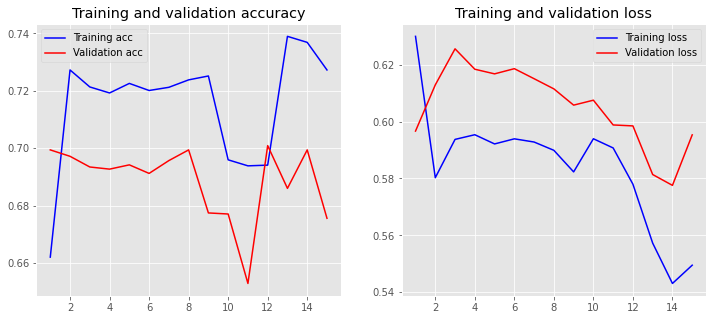

In [ ]:
loss, accuracy = model3.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model3.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history3)

In [ ]:
model_comparison_table['model_name'].append("model with Embading and lstm")
model_comparison_table['preprocessing_methods'].append("removing emojis, removing urls, remove_tweets_img,remov_duplicates,remove_tweets_username,remove_emojis,remove_punctuation,normalizing,normalizeArabic,remove_tweets_extra_white_space,removing_chars,removing_tweet_digits")
model_comparison_table['accuracy'].append(accuracy)

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.layers import Dropout

input_dim = X_train.shape[1]  # Number of features

model = Sequential()

model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(Dropout(0.2, input_shape=(10,)))
#model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', 
               optimizer='adam', 
               metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                510       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 521
Trainable params: 521
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train,
                     epochs=50,
                     verbose=True,
                     validation_data=(X_valid, y_valid_cleaned),
                     batch_size=10)

Epoch 1/50
812/812 [==============================] - 3s 3ms/step - loss: 109.0760 - accuracy: 0.5368 - val_loss: 15.8461 - val_accuracy: 0.5718
Epoch 2/50
812/812 [==============================] - 2s 3ms/step - loss: 5.4555 - accuracy: 0.6140 - val_loss: 2.0362 - val_accuracy: 0.6328
Epoch 3/50
812/812 [==============================] - 2s 3ms/step - loss: 1.1742 - accuracy: 0.6377 - val_loss: 1.1821 - val_accuracy: 0.6469
Epoch 4/50
812/812 [==============================] - 2s 2ms/step - loss: 0.7774 - accuracy: 0.6325 - val_loss: 0.9446 - val_accuracy: 0.6496
Epoch 5/50
812/812 [==============================] - 2s 2ms/step - loss: 0.7149 - accuracy: 0.6366 - val_loss: 0.9254 - val_accuracy: 0.5692
Epoch 6/50
812/812 [==============================] - 2s 2ms/step - loss: 0.6834 - accuracy: 0.6440 - val_loss: 0.8832 - val_accuracy: 0.6257
Epoch 7/50
812/812 [==============================] - 2s 2ms/step - loss: 0.6724 - accuracy: 0.6454 - val_loss: 0.8364 - val_accuracy: 0.6499
Epo

Training Accuracy: 0.6578
Testing Accuracy:  0.6654


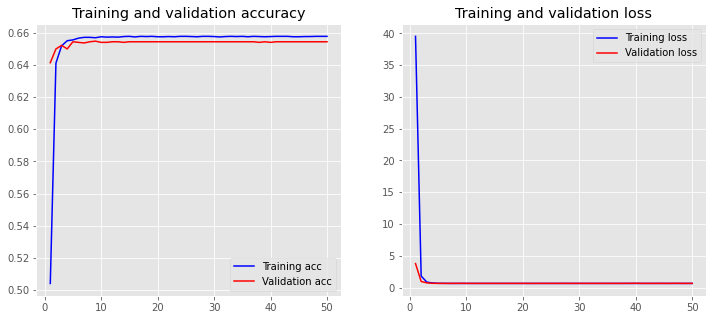

In [ ]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [ ]:
model_comparison_table['model_name'].append("model with one hidden layer")
model_comparison_table['preprocessing_methods'].append("removing emojis, removing urls, remove_tweets_img,remov_duplicates,remove_tweets_username,remove_emojis,remove_punctuation,normalizing,normalizeArabic,remove_tweets_extra_white_space,removing_chars,removing_tweet_digits")
model_comparison_table['accuracy'].append(0.6654)

In [ ]:
model4 = Sequential()

model4.add(Embedding(len(tokenizer.index_word)+1, 50))
    #model3.add(LSTM(100, dropout=0.2, recurrent_dropout=0))
model4.add(GRU(units=32, activation='tanh'))
model4.add(Dense(32, activation='relu'))
model4.add(Dropout(0.2))
model4.add(Dense(1, activation='sigmoid'))
model4.summary()
    # Compile the model
model4.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 50)          1508500   
                                                                 
 gru (GRU)                   (None, 32)                8064      
                                                                 
 dense_6 (Dense)             (None, 32)                1056      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,517,653
Trainable params: 1,517,653
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history4 = model4.fit(X_train, y_train,epochs=20,verbose=True,validation_data=(X_valid, y_valid_cleaned),batch_size=10)

Epoch 1/20
812/812 [==============================] - 45s 52ms/step - loss: 0.6467 - accuracy: 0.6570 - val_loss: 0.6452 - val_accuracy: 0.6525
Epoch 2/20
812/812 [==============================] - 39s 48ms/step - loss: 0.6435 - accuracy: 0.6596 - val_loss: 0.6443 - val_accuracy: 0.6522
Epoch 3/20
812/812 [==============================] - 39s 48ms/step - loss: 0.4928 - accuracy: 0.7545 - val_loss: 0.4619 - val_accuracy: 0.7705
Epoch 4/20
812/812 [==============================] - 38s 46ms/step - loss: 0.3116 - accuracy: 0.8692 - val_loss: 0.5013 - val_accuracy: 0.7746
Epoch 5/20
812/812 [==============================] - 40s 49ms/step - loss: 0.1984 - accuracy: 0.9245 - val_loss: 0.6203 - val_accuracy: 0.7697
Epoch 6/20
812/812 [==============================] - 39s 49ms/step - loss: 0.1258 - accuracy: 0.9549 - val_loss: 0.8060 - val_accuracy: 0.7604
Epoch 7/20
812/812 [==============================] - 38s 47ms/step - loss: 0.0834 - accuracy: 0.9708 - val_loss: 0.8397 - val_accuracy:

Training Accuracy: 0.6602
Testing Accuracy:  0.6636


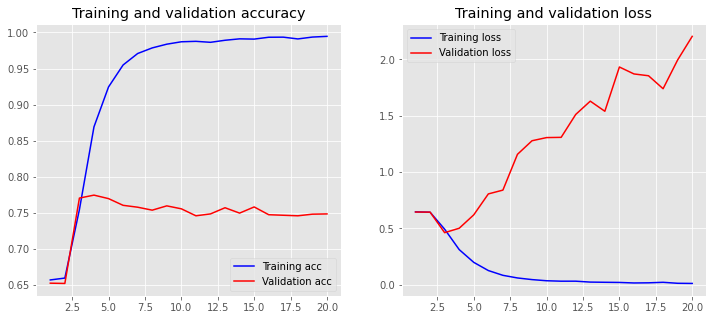

In [ ]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history4)

In [ ]:
model_comparison_table['model_name'].append("model with GRU")
model_comparison_table['preprocessing_methods'].append("removing emojis, removing urls, remove_tweets_img,remov_duplicates,remove_tweets_username,remove_emojis,remove_punctuation,normalizing,normalizeArabic,remove_tweets_extra_white_space,removing_chars,removing_tweet_digits")
model_comparison_table['accuracy'].append(0.6636)

In [ ]:
def create_model(num_Lstm,embedding_dim):
    model3 = Sequential()

    model3.add(Embedding(len(tokenizer.index_word)+1, embedding_dim))#32
    model3.add(LSTM(num_Lstm, dropout=0, recurrent_dropout=0))#32 64 100
    model3.add(Dense(num_Lstm, activation='relu'))
    model3.add(Dense(1, activation='sigmoid'))
    model3.summary()
    # Compile the model
    model3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    return model3

In [ ]:
def create_model1(num_Lstm,embedding_dim):
    model3 = Sequential()

    model3.add(Embedding(len(tokenizer.index_word)+1, 64))
    #model3.add(LSTM(100, dropout=0.2, recurrent_dropout=0))
    model3.add(GRU(units=50, activation='tanh'))
    model3.add(Dense(100, activation='relu'))
    model3.add(Dropout(0.2))
    model3.add(Dense(1, activation='sigmoid'))
    model3.summary()
    # Compile the model
    model3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    return model3

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
# Main settings
epochs = 20
#embedding_dim = 50
maxlen = 10
output_file = 'data/output.txt'
x_train_cleaned = train_data[(train_data["label"] == 0) | (train_data["label"] == 1)]['cleaned_tweet']
y_train = train_data[(train_data["label"] == 0) | (train_data["label"] == 1)]['label']
x_test_cleaned = test_data[(test_data["label"] == 0) | (test_data["label"] == 1)]['cleaned_tweet']
y_test = test_data[(test_data["label"] == 0) | (test_data["label"] == 1)]['label']


# Tokenize words
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(x_train_cleaned )
X_train = tokenizer.texts_to_sequences(x_train_cleaned )
X_test = tokenizer.texts_to_sequences(x_test_cleaned )

# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1

# Pad sequences with zeros
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

# Parameter grid for grid search  64, 100 ,50,60
param_grid = dict(num_Lstm=[32,64], 
                  embedding_dim=[32,50],)

model = KerasClassifier(build_fn=create_model,
                            epochs=epochs, batch_size=10,
                            verbose=False)

grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                              cv=4, verbose=1, n_iter=5)

grid_result = grid.fit(X_train, y_train)

# Evaluate testing set
test_accuracy = grid.score(X_test, y_test)
print(grid_result.best_score_)
print(grid_result.best_params_)
print(test_accuracy)
# Save and evaluate results
s = ('Running {} data set\nBest Accuracy : '
'{:.4f}\n{}\nTest Accuracy : {:.4f}\n\n')
#output_string = s.format(
#grid_result.best_score_,
#grid_result.best_params_,
#test_accuracy)
#print(output_string)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 4 is smaller than n_iter=5. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Fitting 4 folds for each of 4 candidates, totalling 16 fits
Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_49 (Embedding)    (None, None, 32)          965440    
                                                                 
 lstm_48 (LSTM)              (None, 32)                8320      
                                                                 
 dense_98 (Dense)            (None, 32)                1056      
                                                                 
 dense_99 (Dense)            (None, 1)                 33        
                                                                 
Total params: 974,849
Trainable params: 974,849
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_50"
_________________________________________________________________
 Layer (type)                O

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
# Main settings
epochs = 20
#embedding_dim = 50
maxlen = 10
output_file = 'data/output.txt'
x_train_cleaned = train_data[(train_data["label"] == 0) | (train_data["label"] == 1)]['cleaned_tweet']
y_train = train_data[(train_data["label"] == 0) | (train_data["label"] == 1)]['label']
x_test_cleaned = test_data[(test_data["label"] == 0) | (test_data["label"] == 1)]['cleaned_tweet']
y_test = test_data[(test_data["label"] == 0) | (test_data["label"] == 1)]['label']


# Tokenize words
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(x_train_cleaned )
X_train = tokenizer.texts_to_sequences(x_train_cleaned )
X_test = tokenizer.texts_to_sequences(x_test_cleaned )

# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1

# Pad sequences with zeros
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

# Parameter grid for grid search  64, 100 ,50,60
param_grid = dict(num_Lstm=[32,64], 
                  embedding_dim=[32,50],)

model = KerasClassifier(build_fn=create_model1,
                            epochs=epochs, batch_size=10,
                            verbose=False)

grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                              cv=4, verbose=1, n_iter=5)

grid_result = grid.fit(X_train, y_train)

# Evaluate testing set
test_accuracy = grid.score(X_test, y_test)
print(grid_result.best_score_)
print(grid_result.best_params_)
print(test_accuracy)
# Save and evaluate results
s = ('Running {} data set\nBest Accuracy : '
'{:.4f}\n{}\nTest Accuracy : {:.4f}\n\n')
#output_string = s.format(
#grid_result.best_score_,
#grid_result.best_params_,
#test_accuracy)
#print(output_string)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 4 is smaller than n_iter=5. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Fitting 4 folds for each of 4 candidates, totalling 16 fits
Model: "sequential_66"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_66 (Embedding)    (None, None, 64)          1930880   
                                                                 
 gru (GRU)                   (None, 50)                17400     
                                                                 
 dense_132 (Dense)           (None, 100)               5100      
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_133 (Dense)           (None, 1)                 101       
                                                                 
Total params: 1,953,481
Trainable params: 1,953,481
Non-trainable params: 0
_________________________________________________

# Step [4]: Build model with preprocessing methods with all label

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras import layers
#بيعطيني index لكل كلمة بعبر عن الاكثر تكرار
tokenizer = Tokenizer(num_words=4000)
tokenizer.fit_on_texts(x_train_cleaned_all)

X_train = tokenizer.texts_to_sequences(x_train_cleaned_all )
X_test = tokenizer.texts_to_sequences(x_test_cleaned_all)
X_vlaid = tokenizer.texts_to_sequences(x_valid_cleaned_all)


vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

In [ ]:
len(X_train)

19356

In [ ]:
from keras.preprocessing.sequence import pad_sequences

maxlen = 50

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
X_valid = pad_sequences(X_vlaid, padding='post', maxlen=maxlen)
X_train1 =X_train.tolist()

In [ ]:
model5 = Sequential()

model5.add(Embedding(len(tokenizer.index_word)+1, 32))
#model3.add(LSTM(100, dropout=0.2, recurrent_dropout=0))
model5.add(GRU(units=32, activation='tanh'))
model5.add(Dense(32, activation='relu'))
model5.add(Dropout(0.2))
model5.add(Dense(1, activation='sigmoid'))
model5.summary()
    # Compile the model
model5.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          1638624   
                                                                 
 gru_2 (GRU)                 (None, 32)                6336      
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,646,049
Trainable params: 1,646,049
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model5.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history5 = model5.fit(X_train, y_train_all,epochs=20,verbose=True,validation_data=(X_valid, y_valid_cleaned_all),batch_size=10)

طباعة جدول المقارنة النهائي الذي ستقوم بملئه أثناء الحل

In [ ]:
import pandas as pd

df = pd.DataFrame(model_comparison_table)
df

,model_name,preprocessing_methods,accuracy
0,logistic regression with bag of words,none,0.785425
1,logistic regression with bag of words with Bal...,none,0.761870
2,logistic regression with bag of words with Bal...,"removing emojis, removing urls, remove_tweets_...",0.768495
3,logistic regression with tfidf with Balance,"removing emojis, removing urls, remove_tweets_...",0.793522
4,model with Embading and lstm,"removing emojis, removing urls, remove_tweets_...",0.755245
5,model with one hidden layer,"removing emojis, removing urls, remove_tweets_...",0.665400
6,model with GRU,"removing emojis, removing urls, remove_tweets_...",0.663600
7,model with Embading and lstm,"removing emojis, removing urls, remove_tweets_...",0.678322


In [ ]:
df.to_csv("[امل حجازي].csv", index=False)